## Visualise trajectory
In this notebooks, the recorded trajectories are visualised

#### Setup

In [1]:
import os
import json
import pathlib
from src.data import scene
from src.visualisation.observation_visualisation import display_sample
from IPython.display import clear_output
import time
from matplotlib import pyplot as plt

In [2]:
if pathlib.PurePath(os.getcwd()).name == 'notebooks':
    os.chdir('..')

In [3]:
with open('config/trajectories.json', 'r') as f:
    json_dict = json.load(f)

In [4]:
trajectory_to_visualise: int = 1

In [5]:
scene_path, actions = list(json_dict.items())[trajectory_to_visualise]

In [6]:
sim = scene.initialize_scene(f"data/raw/train/scene_datasets/hm3d/train/{scene_path}")

### Epilepsy warning

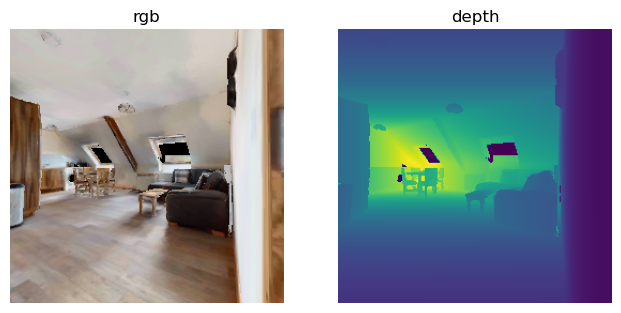

In [7]:
total_frames = 0

max_frames = len(actions)
observations = sim.step('move_forward')

while total_frames < max_frames:
    try:
        rgb = observations["color_sensor"]
        depth = observations["depth_sensor"]

        if display:
            display_sample(rgb, depth_obs=depth)
            # If your notebook crashes, try increasing this
            time.sleep(0.1)
            clear_output(wait=True)

        observations = sim.step(actions[total_frames])
        total_frames += 1
    except KeyboardInterrupt:
        break